In [3]:
import seaborn
import pandas as pd 
import numpy as np 
import bs4
import sys
sys.path.append("../")
from src.utils.requester import Requester


In [4]:
df = pd.read_csv("../src/final.csv", sep="\t", encoding="utf-16")

In [5]:
df.head()

,sourceId,id,name,aidDetails,environmentalTopics,text,0,1,2,3,...,8,9,10,11,list,best_cat,embeddings,x,y,summary
0,at_94683,189,Financer les études et tests préalables aux in...,Aide - « Études et tests préalables aux in...,[{'name': 'Incorporation de produits recyclés'...,Financer les études et tests préalables aux in...,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0.24530917, -0.45248967, 0.26932323, 0.065736...",8.650175,1.438333,<pad> Aide : « Études et tests préalables aux ...
1,at_58447,178,Soutenir financièrement le développement de l'...,Le dispositif de l'ADEME – ORPLAST (Objectif...,[{'name': 'Incorporation de produits recyclés'...,Soutenir financièrement le développement de l'...,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0.21968801, -0.29245776, 0.029468633, -0.1774...",8.717999,0.948586,<pad> Le dispositif de l'ADEME – ORPLAST (Obje...
2,at_94687,203,Financer les études de préfiguration d'une dém...,Aide - « Étude de préfiguration d'une démarc...,"[{'name': ""Réduction de l'empreinte carbone"", ...",Financer les études de préfiguration d'une dém...,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2.0,"[0.34330258, -0.14042644, -0.28076363, 0.18257...",8.717293,6.110090,<pad> L'ADEME peut cofinancer votre étude de p...
3,at_71467,150,Réaliser des investissements de décarbonation ...,Plusieurs dispositifs sont ouverts aux entre...,"[{'name': ""Réduction de l'empreinte carbone"", ...",Réaliser des investissements de décarbonation ...,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0.40779048, -0.25010952, -0.2539999, 0.253258...",8.052450,5.424581,<pad> L'aide s'adresse aux entreprises industr...
4,at_94689,161,Financer des audits énergétiques en entreprise...,Aide - « Financement des audits énergétiqu...,"[{'name': ""Réduction de la consommation d'éner...",Financer des audits énergétiques en entreprise...,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[-0.2057324, -0.07750451, -0.1861022, 0.356966...",6.816878,8.291476,<pad> L'ADEME Objectif : en entreprise et enco...


In [2]:
R = Requester()

In [4]:
T = R.get_themes_mt()
A = R.get_aids_mt()

In [5]:
l = []
for i in range(len(T)):
    l += T[i]["categories"]

KeyError: 'categories'

In [6]:
len(A)

390

In [7]:
DF = pd.DataFrame(columns = A[0].keys())
for i in range(len(A)):
    DF = DF.append(A[i], ignore_index=True)

In [8]:
DF.loc[88 ,  "environmentalTopics"]

[{'name': 'Energies Renouvelables', 'id': 22},
 {'name': 'Réseaux de chaleur & Récupération de chaleur', 'id': 12}]

In [9]:
DF["subclasses"] = DF["environmentalTopics"].apply(lambda x: [i["id"] for i in x])

In [10]:
TF = pd.DataFrame(columns = T[0].keys())
for i in range(len(T)):
    TF = TF.append(T[i], ignore_index=True)

In [11]:
print(TF.head())

  id                                name  \
0  1  Evolution des procédés industriels   
1  4               Gestion des bâtiments   
2  6                 Gestion des déchets   
3  3      Innovation produits & services   
4  9               Mobilité des employés   

                                 environmentalTopics  \
0  [{'name': 'Incorporation de produits recyclés'...   
1  [{'name': 'Amélioration de la qualité de l'air...   
2  [{'name': 'Traitement & valorisation des biodé...   
3  [{'name': 'Recherche, Développement & Innovati...   
4  [{'name': 'Développement du ferroviaire', 'id'...   

                                         description  
0  Exemples de projets :\r\nEfficacité énergétiqu...  
1  Exemples de projets :\r\nConstruction/rénovati...  
2  Exemples de projets :\r\nAide à l’investisseme...  
3  Exemples de projets :\r\nEco-conception, accom...  
4  Exemples de projets :\r\nAide à l’acquisition ...  


In [1]:
import pandas as pd 

df = pd.read_csv("../src/processings.csv", sep="\t", encoding="utf-16")

In [2]:
df.head()

,sourceId,id,name,aidDetails,environmentalTopics,subclasses,classes
0,at_94683,189,Financer les études et tests préalables aux in...,Aide - « Études et tests préalables aux in...,[{'name': 'Incorporation de produits recyclés'...,[1],[1]
1,at_58447,178,Soutenir financièrement le développement de l'...,Le dispositif de l'ADEME – ORPLAST (Objectif...,[{'name': 'Incorporation de produits recyclés'...,[1],[1]
2,at_94687,203,Financer les études de préfiguration d'une dém...,Aide - « Étude de préfiguration d'une démarc...,"[{'name': ""Réduction de l'empreinte carbone"", ...",[3],[1]
3,at_71467,150,Réaliser des investissements de décarbonation ...,Plusieurs dispositifs sont ouverts aux entre...,"[{'name': ""Réduction de l'empreinte carbone"", ...",[3],[1]
4,at_94689,161,Financer des audits énergétiques en entreprise...,Aide - « Financement des audits énergétiqu...,"[{'name': ""Réduction de la consommation d'éner...","[6, 7]",[1 4]


In [12]:
TF["subclasses"] = TF["environmentalTopics"].apply(lambda x: [i["id"] for i in x])

subclasses2classes = {}
for i in range(TF.shape[0]):
    for l in TF.loc[i, "subclasses"]:
        subclasses2classes[l] = TF.loc[i, "id"]
print(subclasses2classes)

{1: 1, 9: 1, 6: 1, 3: 1, 8: 1, 14: 4, 7: 4, 20: 4, 46: 4, 17: 6, 15: 6, 16: 6, 4: 3, 5: 3, 11: 3, 10: 3, 42: 9, 43: 9, 23: 9, 21: 5, 22: 5, 12: 5, 13: 5, 37: 11, 49: 11, 39: 7, 19: 8, 25: 8, 26: 8, 27: 8, 28: 8, 29: 8, 30: 7, 53: 8, 48: 12, 34: 10, 41: 10, 52: 10, 54: 10, 55: 10, 56: 10, 33: 10, 2: 2, 57: 2, 32: 2, 31: 2, 24: 7, 40: 7, 38: 7, 47: 7, 18: 7}


In [13]:
L = []
for i in range(TF.shape[0]):
    L = L + TF.loc[i, "subclasses"]

In [14]:
np.unique(L).shape

(51,)

In [15]:
TF["countSubclasses"] = TF["subclasses"].apply(lambda x: len(x))

In [16]:
DF.id

0      189
1      178
2      203
3      150
4      161
      ... 
385    280
386     96
387     59
388     64
389     62
Name: id, Length: 390, dtype: object

In [17]:
DF

,name,perimeter,goal,beneficiary,aidDetails,eligibility,conditions,fundingSourceUrl,applicationEndDate,applicationUrl,...,contactGuidelines,subventionRateUpperBound,subventionRateLowerBound,loanAmount,applicationStartDate,projectExamples,directAccess,types,id,subclasses
0,Financer les études et tests préalables aux in...,NATIONAL,None,None,<p>\n <strong>\n Aide - « Études et tests pré...,<p>\n Critères d'éligibilité\n <br/>\n</p>\n<u...,None,https://agirpourlatransition.ademe.fr/entrepri...,None,,...,"<p>\n Contactez l'ADEME via leur\n <a href=""ht...",70,None,None,2021-11-09T15:42:42+00:00,<p>\n Actions éligibles :\n <br/>\n</p>\n<ul>\...,False,"[{'name': 'Aide financière', 'id': 1}]",189,[1]
1,Soutenir financièrement le développement de l'...,NATIONAL,None,None,<p>\n Le dispositif de l'ADEME – ORPLAST (Obje...,"<p>\n <strong>\n Sont éligibles, les dossiers...",None,https://appelsaprojets.ademe.fr/aap/ORPLAST202...,2022-09-15T00:00:00+00:00,,...,<p>\n <strong>\n Auvergne-Rhône-Alpes\n </str...,None,None,None,2020-09-22T00:00:00+00:00,<p>\n En cas de questions relatives à l'appel ...,False,"[{'name': 'Aide financière', 'id': 1}]",178,[1]
2,Financer les études de préfiguration d'une dém...,NATIONAL,None,None,<p>\n Aide - « Étude de préfiguration d'une dé...,,None,https://agirpourlatransition.ademe.fr/entrepri...,None,,...,"<p>\n Contactez l'ADEME via leur\n <a href=""ht...",69,None,None,2021-11-09T15:42:48+00:00,<p>\n Actions éligibles :\n <br/>\n</p>\n<p>\n...,False,"[{'name': 'Aide financière', 'id': 1}]",203,[3]
3,Réaliser des investissements de décarbonation ...,NATIONAL,None,None,<p>\n Plusieurs dispositifs sont ouverts aux e...,<p>\n <strong>\n Pour que la demande d'aide s...,None,https://www.asp-public.fr/aide-en-faveur-des-i...,2022-12-31T00:00:00+00:00,,...,"<p>\n Pour toutes demandes de renseignements, ...",None,None,None,2020-09-15T00:00:00+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",150,[3]
4,Financer des audits énergétiques en entreprise...,NATIONAL,None,None,<p>\n <strong>\n Aide - « Financement des aud...,<p>\n Critères d'éligibilité : u\n ne étude de...,None,https://agirpourlatransition.ademe.fr/entrepri...,None,,...,"<p>\n Pour en savoir plus sur ce dispositif, c...",70,None,None,2021-11-09T15:42:41+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",161,"[6, 7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Soutenir l'émergence de solutions innovantes p...,REGIONAL,None,None,<p>\n <strong>\n La Région soutient l'émergen...,,None,https://www.iledefrance.fr/soutien-aux-actions...,None,,...,<p>\n Les porteurs de projet intéressés peuven...,None,None,None,2021-10-05T19:09:55+00:00,<p>\n <strong>\n Les projets peuvent exploite...,False,"[{'name': 'Aide financière', 'id': 1}]",280,"[47, 5, 4, 10]"
386,Sortir de vacance les logements locatifs privés,REGIONAL,None,None,<p>\n Le présent dispositif vise à remettre su...,<p>\n <strong>\n Bénéficiaires éligibles :\n ...,None,,None,,...,<p>\n Département de la Vendée\n</p>\n<p>\n Pô...,None,None,None,2021-11-09T15:42:41+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",96,[24]
387,Soutenir l'économie de proximité en finançant ...,REGIONAL,None,None,<p>\n <strong>\n Aide - « Fonds régional des ...,,None,https://www.bourgognefranchecomte.fr/node/2835,2021-12-31T00:00:00+00:00,,...,"<p>\n <ul>\n <li>\n Votre intercommunalité,...",None,None,None,2021-11-09T15:42:40+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",59,[10]
388,Soutenir le développement d'investissements ag...,REGIONAL,None,None,<p>\n La Région Occitanie est aux côtés des ac...,<p>\n <strong>\n Bénéficiaires\n </strong>\n ...,None,https://www.laregion.fr/PASS-Agritourisme,None,,...,<p>\n Contact\n</p>\n<p>\n Direction de l'Agri...,None,None,None,2021-11-09T15:42:40+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",64,[30]


<AxesSubplot:xlabel='id', ylabel='countSubclasses'>

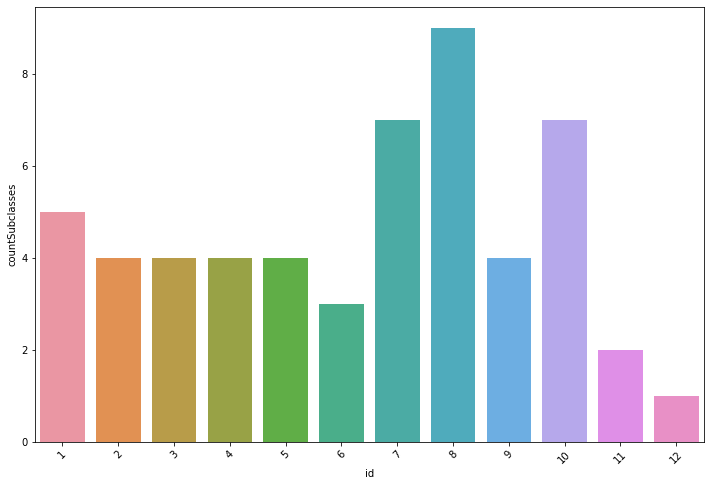

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)

sns.barplot(data=TF, x="id", y="countSubclasses")

In [20]:
STF = pd.DataFrame()
STF["id"] = np.unique(L)

In [21]:
type(DF.loc[0, "subclasses"])

list

In [22]:
STF["countAids"] = 0

for i in range(DF.shape[0]):
    for k in range(STF.shape[0]):
        if STF.loc[k, "id"] in DF.loc[i, "subclasses"]:
            STF.loc[k, "countAids"] += 1

<AxesSubplot:xlabel='id', ylabel='countAids'>

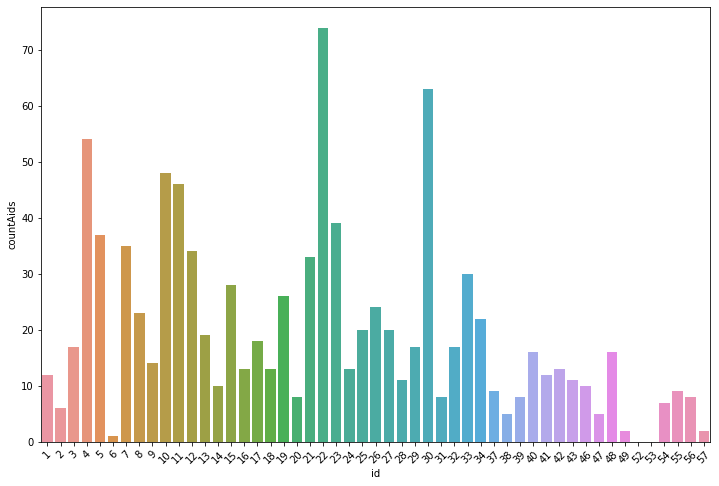

In [23]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(data=STF, x="id", y="countAids")

In [24]:
DF["countSubclasses"] = DF["environmentalTopics"].apply(lambda x: len(x))

In [25]:
DF

,name,perimeter,goal,beneficiary,aidDetails,eligibility,conditions,fundingSourceUrl,applicationEndDate,applicationUrl,...,subventionRateUpperBound,subventionRateLowerBound,loanAmount,applicationStartDate,projectExamples,directAccess,types,id,subclasses,countSubclasses
0,Financer les études et tests préalables aux in...,NATIONAL,None,None,<p>\n <strong>\n Aide - « Études et tests pré...,<p>\n Critères d'éligibilité\n <br/>\n</p>\n<u...,None,https://agirpourlatransition.ademe.fr/entrepri...,None,,...,70,None,None,2021-11-09T15:42:42+00:00,<p>\n Actions éligibles :\n <br/>\n</p>\n<ul>\...,False,"[{'name': 'Aide financière', 'id': 1}]",189,[1],1
1,Soutenir financièrement le développement de l'...,NATIONAL,None,None,<p>\n Le dispositif de l'ADEME – ORPLAST (Obje...,"<p>\n <strong>\n Sont éligibles, les dossiers...",None,https://appelsaprojets.ademe.fr/aap/ORPLAST202...,2022-09-15T00:00:00+00:00,,...,None,None,None,2020-09-22T00:00:00+00:00,<p>\n En cas de questions relatives à l'appel ...,False,"[{'name': 'Aide financière', 'id': 1}]",178,[1],1
2,Financer les études de préfiguration d'une dém...,NATIONAL,None,None,<p>\n Aide - « Étude de préfiguration d'une dé...,,None,https://agirpourlatransition.ademe.fr/entrepri...,None,,...,69,None,None,2021-11-09T15:42:48+00:00,<p>\n Actions éligibles :\n <br/>\n</p>\n<p>\n...,False,"[{'name': 'Aide financière', 'id': 1}]",203,[3],1
3,Réaliser des investissements de décarbonation ...,NATIONAL,None,None,<p>\n Plusieurs dispositifs sont ouverts aux e...,<p>\n <strong>\n Pour que la demande d'aide s...,None,https://www.asp-public.fr/aide-en-faveur-des-i...,2022-12-31T00:00:00+00:00,,...,None,None,None,2020-09-15T00:00:00+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",150,[3],1
4,Financer des audits énergétiques en entreprise...,NATIONAL,None,None,<p>\n <strong>\n Aide - « Financement des aud...,<p>\n Critères d'éligibilité : u\n ne étude de...,None,https://agirpourlatransition.ademe.fr/entrepri...,None,,...,70,None,None,2021-11-09T15:42:41+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",161,"[6, 7]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Soutenir l'émergence de solutions innovantes p...,REGIONAL,None,None,<p>\n <strong>\n La Région soutient l'émergen...,,None,https://www.iledefrance.fr/soutien-aux-actions...,None,,...,None,None,None,2021-10-05T19:09:55+00:00,<p>\n <strong>\n Les projets peuvent exploite...,False,"[{'name': 'Aide financière', 'id': 1}]",280,"[47, 5, 4, 10]",4
386,Sortir de vacance les logements locatifs privés,REGIONAL,None,None,<p>\n Le présent dispositif vise à remettre su...,<p>\n <strong>\n Bénéficiaires éligibles :\n ...,None,,None,,...,None,None,None,2021-11-09T15:42:41+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",96,[24],1
387,Soutenir l'économie de proximité en finançant ...,REGIONAL,None,None,<p>\n <strong>\n Aide - « Fonds régional des ...,,None,https://www.bourgognefranchecomte.fr/node/2835,2021-12-31T00:00:00+00:00,,...,None,None,None,2021-11-09T15:42:40+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",59,[10],1
388,Soutenir le développement d'investissements ag...,REGIONAL,None,None,<p>\n La Région Occitanie est aux côtés des ac...,<p>\n <strong>\n Bénéficiaires\n </strong>\n ...,None,https://www.laregion.fr/PASS-Agritourisme,None,,...,None,None,None,2021-11-09T15:42:40+00:00,,False,"[{'name': 'Aide financière', 'id': 1}]",64,[30],1


In [26]:
TF[TF["id"]==1].name[0]

'Evolution des procédés industriels'

In [27]:
TTF = pd.DataFrame()
TTF["id"] = TF["id"]

TTF["countAids"] = 0

for i in range(DF.shape[0]):
    for k in range(TTF.shape[0]):
        if TTF.loc[k, "id"] in DF.loc[i, "classes"]:
            TTF.loc[k, "countAids"] += 1

KeyError: 'classes'

<AxesSubplot:xlabel='id', ylabel='countAids'>

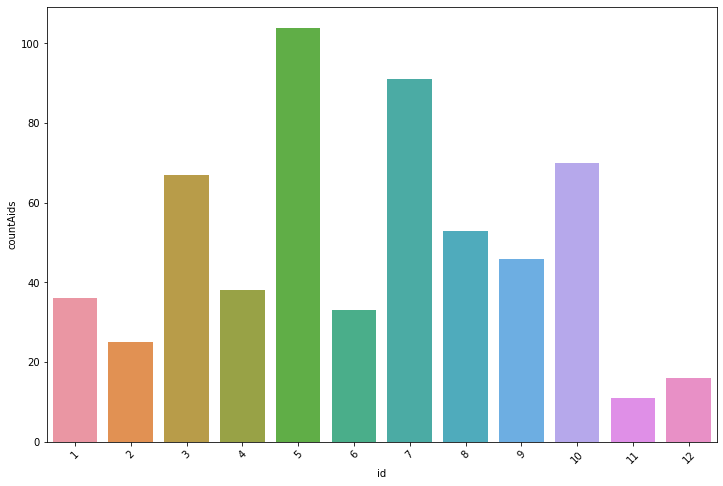

In [80]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(data=TTF, x="id", y="countAids")

In [29]:
DF["classes"] = DF["subclasses"].apply(lambda x: np.unique([subclasses2classes[i] for i in x]))
# DF["classesNames"] = DF["classes"].apply(lambda x: [TF[TF["id"]==i].name[0] for i in x])

In [32]:
DF.to_csv("../data/aids_mt.csv", sep="\t", index=False)

In [35]:
DF["classes"] = DF.classes.apply(lambda x: ','.join(list(x)))

TypeError: sequence item 0: expected str instance, numpy.int32 found

In [39]:
list(DF.loc[1,"classes"])

[1]

In [6]:
labels = pd.read_csv("./transition/bases_aides.csv", sep="\t")

In [7]:
labels.shape

(502, 4)

In [8]:
labels["classe"] = labels["Thématique - Sous-thématique"].apply(lambda x: x.split(";"))

In [9]:
L = []
for x in labels["classe"]:
    L += x
    
L = np.unique(L)
L.shape

(104,)

In [10]:

L = [len(x) for x in labels["classe"]]

In [11]:
np.unique(L)

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 13, 14, 17, 20, 21, 22, 23,
       26, 32])

In [12]:
labels["nb_classes"] = labels["classe"].apply(lambda x: len(x))

In [13]:
DF = data.merge(labels, on="source_id")
# application_end_date ?? application_url ?? funding_source_url ?? slug ? funding_types ?
#
print(DF.columns)
print(DF.shape)
DF = DF[["id", "source_id", "name", "perimeter", "aid_details", "eligibility", 
         "funding_types", "subvention_rate_upper_bound", "subvention_rate_lower_bound", "Focus", "project_examples",
         "Région", "Thématique - Sous-thématique", "classe", "nb_classes"]]
DF.head(2)

Index(['id', 'aid_advisor_id', 'funder_id', 'ulid', 'source_id', 'name',
       'perimeter', 'goal', 'beneficiary', 'aid_details', 'eligibility',
       'conditions', 'funding_source_url', 'application_end_date',
       'application_url', 'state', 'slug', 'funding_types',
       'contact_guidelines', 'source_updated_at',
       'subvention_rate_upper_bound', 'subvention_rate_lower_bound',
       'loan_amount', 'application_start_date', 'project_examples',
       'direct_access', 'created_at', 'updated_at', 'deleted_at', 'aid_id',
       'region_id', 'id-2', 'name-2', 'aid_id-2', 'aid_type_id', 'id-3',
       'name-3', 'slug-2', 'aid_id-3', 'id-4', 'name-4', 'slug-3', 'Région',
       'Thématique - Sous-thématique', 'Focus', 'classe', 'nb_classes'],
      dtype='object')
(835, 47)


,id,source_id,name,perimeter,aid_details,eligibility,funding_types,subvention_rate_upper_bound,subvention_rate_lower_bound,Focus,project_examples,Région,Thématique - Sous-thématique,classe,nb_classes
0,198,at_94683,Financer les études et tests préalables aux in...,NATIONAL,<p>\n <strong>\n Aide - « Études et tests pré...,<p>\n Critères d'éligibilité\n <br/>\n</p>\n<u...,"a:1:{i:0;s:10:""Subvention"";}",70.0,NaN,NaN,<p>\n Actions éligibles :\n <br/>\n</p>\n<ul>\...,National,Evolution des procédés industriels - Incorpora...,[Evolution des procédés industriels - Incorpor...,1
1,187,at_58447,Soutenir financièrement le développement de l'...,NATIONAL,<p>\n Le dispositif de l'ADEME – ORPLAST (Obje...,"<p>\n <strong>\n Sont éligibles, les dossiers...","a:1:{i:0;s:10:""Subvention"";}",NaN,NaN,NaN,<p>\n En cas de questions relatives à l'appel ...,National,Evolution des procédés industriels - Incorpora...,[Evolution des procédés industriels - Incorpor...,1


In [14]:
L = []
for x in DF["classe"]:
    L += x    
L = [x for x in L if x not in ["", " "]]
L = np.unique(L)

In [15]:
L

array(['  Secteur Agriculture & Zones rurales - Biodiversité & Bien-être animal',
       ' Développement des circuits courts',
       ' Evolution des procédés industriels - Incorporation de produits recyclés',
       " Evolution des procédés industriels - Réduction de l'empreinte carbone",
       ' Evolution des procédés industriels - Réduction des pollutions & dépollution',
       ' Evolution des procédés industriels - Réduction du gaspillage',
       ' Gestion des bâtiments - Acquisition & extension des locaux',
       " Gestion des bâtiments - Amélioration de la qualité de l'air",
       ' Gestion des bâtiments - Bilan énergétique & Rénovation',
       ' Gestion des bâtiments - Sensibilisation sur les consommations',
       ' Gestion des déchets - Développement de recycleries',
       ' Gestion des déchets - Traitement & valorisation des biodéchets',
       ' Gestion des déchets - Tri, recyclage, réemploi & réparation',
       ' Infrastructures de transport',
       ' Innovation pro

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer

le = LabelEncoder()
ohe = OneHotEncoder()
mlb = MultiLabelBinarizer()
le.fit_transform(L)
DF["le"] = DF["classe"].apply(lambda x: tuple([le.transform([e])[0] for e in x if e not in ["", " "]]))

ohe.fit(L.reshape(-1,1))

OneHotEncoder()

In [17]:
DF["first_label"] = DF["le"].apply(lambda x: x[0])

In [18]:
mlb.fit(DF["le"])

MultiLabelBinarizer()

In [19]:
for i in range(DF.shape[0]):
    tmp = DF["le"].iloc[i]
    res = mlb.transform([tmp])[0]
    for k in range(len(res)):
        DF.loc[i,k] = res[k]

In [20]:
DF[["id"]+list(range(99))].groupby(33).count()

,id,0,1,2,3,4,5,6,7,8,...,89,90,91,92,93,94,95,96,97,98
33,,,,,,,,,,,,,,,,,,,,,
0.0,779,779,779,779,779,779,779,779,779,779,...,779,779,779,779,779,779,779,779,779,779
1.0,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56


In [21]:
le.transform(L)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [22]:
L

array(['  Secteur Agriculture & Zones rurales - Biodiversité & Bien-être animal',
       ' Développement des circuits courts',
       ' Evolution des procédés industriels - Incorporation de produits recyclés',
       " Evolution des procédés industriels - Réduction de l'empreinte carbone",
       ' Evolution des procédés industriels - Réduction des pollutions & dépollution',
       ' Evolution des procédés industriels - Réduction du gaspillage',
       ' Gestion des bâtiments - Acquisition & extension des locaux',
       " Gestion des bâtiments - Amélioration de la qualité de l'air",
       ' Gestion des bâtiments - Bilan énergétique & Rénovation',
       ' Gestion des bâtiments - Sensibilisation sur les consommations',
       ' Gestion des déchets - Développement de recycleries',
       ' Gestion des déchets - Traitement & valorisation des biodéchets',
       ' Gestion des déchets - Tri, recyclage, réemploi & réparation',
       ' Infrastructures de transport',
       ' Innovation pro

In [23]:
DF.groupby(0).count()["id"].values[1]

2

In [24]:
df_hist = pd.DataFrame()
df_hist["class"] = range(100)
df_hist = df_hist.set_index("class")
df_hist["text"] = L

In [25]:
for k in range(len(L)):
    tmp = DF.groupby(k).count()["id"].values[1]
    df_hist.loc[k,"count"] = tmp
        

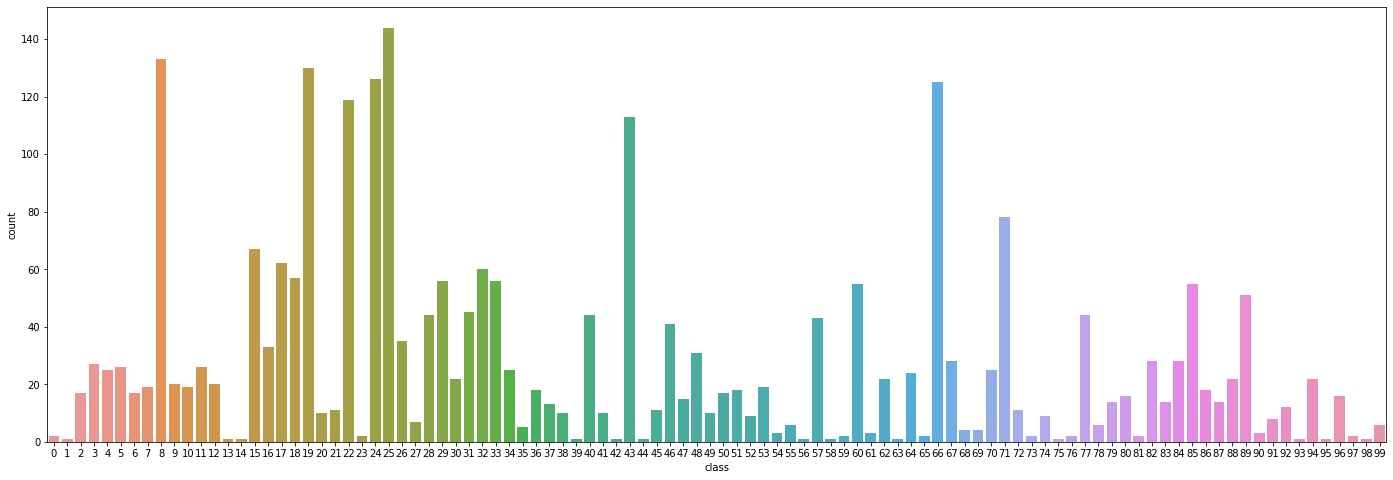

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(24,8))
sns.barplot(data=df_hist.reset_index(), x="class", y="count" )
plt.xticks(rotation=0)
plt.show()

In [27]:
le.transform(np.array([DF["classe"].iloc[150][0]]))

array([64])

In [28]:
np.array(DF["Thématique - Sous-thématique"].tolist()).shape

(835,)

In [29]:
from bs4 import BeautifulSoup

def remove_tags(html):
      
    # parse html content
    soup = BeautifulSoup(html, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

DF["project_examples"] = DF["project_examples"].apply(lambda x: remove_tags(x) if not pd.isna(x) else "")
DF["aid_details"] = DF["aid_details"].apply(lambda x: remove_tags(x) if not pd.isna(x) else "")
DF["eligibility"] = DF["eligibility"].apply(lambda x: remove_tags(x) if not pd.isna(x) else "")


In [30]:
DF

,id,source_id,name,perimeter,aid_details,eligibility,funding_types,subvention_rate_upper_bound,subvention_rate_lower_bound,Focus,...,90,91,92,93,94,95,96,97,98,99
0,198,at_94683,Financer les études et tests préalables aux in...,NATIONAL,Aide - « Études et tests préalables aux invest...,Critères d'éligibilité Pertinence du projet vi...,"a:1:{i:0;s:10:""Subvention"";}",70.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,187,at_58447,Soutenir financièrement le développement de l'...,NATIONAL,Le dispositif de l'ADEME – ORPLAST (Objectif R...,"Sont éligibles, les dossiers portant sur un ou...","a:1:{i:0;s:10:""Subvention"";}",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,at_90955,Soutenir financièrement l'intégration de matiè...,REGIONAL,ORPLAST 3 (Objectif Recyclage PLASTiques) est ...,Calendrier : L'appel à projet est ouvert jusqu...,"a:1:{i:0;s:10:""Subvention"";}",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,213,at_94687,Financer les études de préfiguration d'une dém...,NATIONAL,Aide - « Étude de préfiguration d'une démarche...,,"a:1:{i:0;s:10:""Subvention"";}",69.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,153,at_94217,Améliorer l'efficacité énergétique des procédé...,NATIONAL,AAP - « Efficacité des procédés et des utilité...,Critères d'éligibilité : Les projets devront :...,"a:1:{i:0;s:10:""Subvention"";}",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,403,at_30546,Développer un tourisme de pleine nature éco-re...,REGIONAL,Le développement de la destination « Lauragais...,Critère général : Intérêt supra communal du pr...,"a:3:{i:0;s:10:""Subvention"";i:1;s:21:""Ingénieri...",48.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
831,28,at_72354,Programme LEADER du Grand Beauvaisis,REGIONAL,Le Pôle Territorial du Grand Beauvaisis (PETR)...,Le périmètre de l'aide se limite aux quatre in...,"a:4:{i:0;s:10:""Subvention"";i:1;s:21:""Ingénieri...",80.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
832,28,at_72354,Programme LEADER du Grand Beauvaisis,REGIONAL,Le Pôle Territorial du Grand Beauvaisis (PETR)...,Le périmètre de l'aide se limite aux quatre in...,"a:4:{i:0;s:10:""Subvention"";i:1;s:21:""Ingénieri...",80.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,28,at_72354,Programme LEADER du Grand Beauvaisis,REGIONAL,Le Pôle Territorial du Grand Beauvaisis (PETR)...,Le périmètre de l'aide se limite aux quatre in...,"a:4:{i:0;s:10:""Subvention"";i:1;s:21:""Ingénieri...",80.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


de 690
et 430
des 403
les 337
la 306
ou 160
développer 154
pour 149
développement 147
en 145
innovation 143
un 142
projet 111
dans 106
recherche 106
accompagner 98
le 95
soutenir 81
projets 77
du 68


<AxesSubplot:title={'center':'Top 20 words in name before removing stop words'}, xlabel='name', ylabel='Count'>

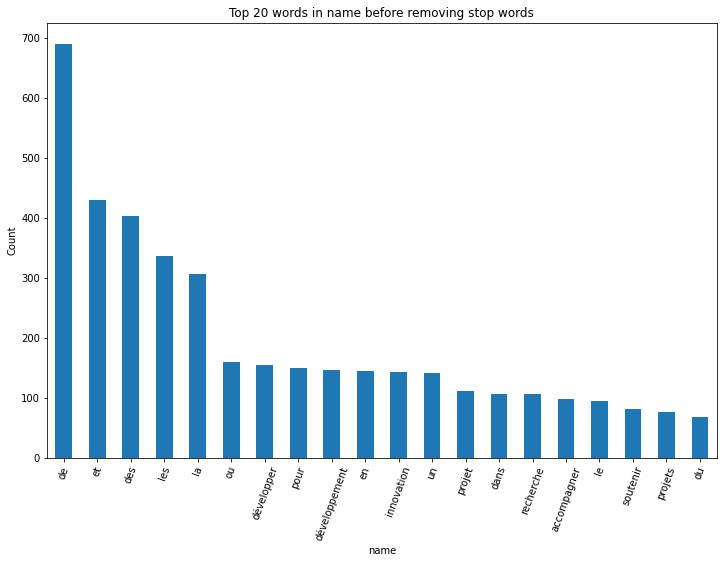

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(DF['name'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['name' , 'count'])
plt.figure(figsize=(12,8))
df1.groupby('name').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', title='Top 20 words in name before removing stop words', rot=70)


<AxesSubplot:title={'center':'Top 20 words in name after removing stop words'}, xlabel='name', ylabel='Count'>

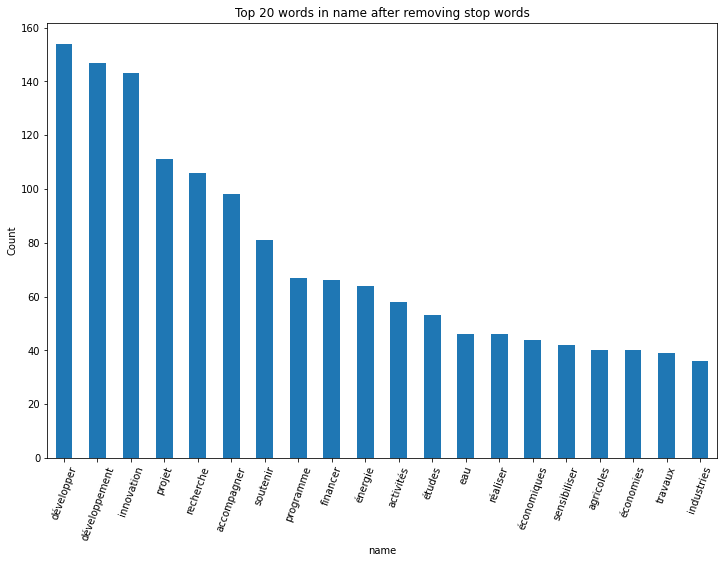

In [32]:
FRENCH_STOP_WORDS = ["et", "de", "un", "ou", "les", "des", "en", "pour", "dans", "le", "projets", "la", "le", "du", "donc", "d'un", "d'une", "l'",
                     "un","une", "vos", "votre", "nos", "notre", "ton", "ta", "vous", "ces", "ses", "sur", "aux", "non", "au" ]

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=FRENCH_STOP_WORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(DF['name'], 20)
# for word, freq in common_words:
#     print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['name' , 'count'])
plt.figure(figsize=(12,8))
df2.groupby('name').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', rot=70, title='Top 20 words in name after removing stop words')

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(DF["name"])
X_train_counts.shape

(835, 1135)

In [34]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)


In [35]:
X_train_tfidf = tf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(835, 1135)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [37]:
X_pca = pca.fit_transform(X_train_tfidf.todense())

In [38]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.12975313 0.05479394]
[9.63156356 6.25898815]


In [39]:
pc_df = pd.DataFrame(data = X_pca , 
        columns = ['PC1', 'PC2'])
pc_df['Cluster'] = DF["Thématique - Sous-thématique"]
pc_df.head()

,PC1,PC2,Cluster
0,-0.291365,0.038139,Evolution des procédés industriels - Incorpora...
1,0.163967,0.010076,Evolution des procédés industriels - Incorpora...
2,-0.000134,-0.015705,Evolution des procédés industriels - Incorpora...
3,-0.070253,0.082342,Evolution des procédés industriels - Réduction...
4,0.008985,-0.170216,Evolution des procédés industriels - Réduction...


<Figure size 864x576 with 0 Axes>

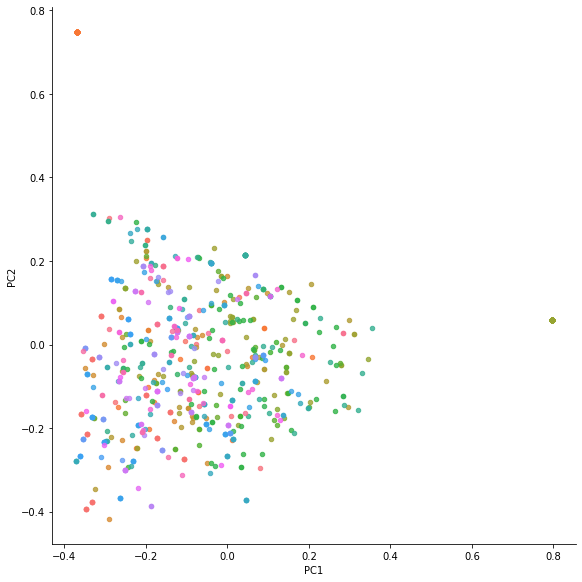

In [40]:
plt.figure(figsize=(12,8))
sns.lmplot(x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 20},
  height=8) # specify the point size

In [41]:
DF.shape

(835, 117)

In [42]:
data.shape

(730, 42)

In [43]:
DF.name

0      Financer les études et tests préalables aux in...
1      Soutenir financièrement le développement de l'...
2      Soutenir financièrement l'intégration de matiè...
3      Financer les études de préfiguration d'une dém...
4      Améliorer l'efficacité énergétique des procédé...
                             ...                        
830    Développer un tourisme de pleine nature éco-re...
831                 Programme LEADER du Grand Beauvaisis
832                 Programme LEADER du Grand Beauvaisis
833                 Programme LEADER du Grand Beauvaisis
834                 Programme LEADER du Grand Beauvaisis
Name: name, Length: 835, dtype: object

In [44]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="camembert/camembert-large")

Some weights of the model checkpoint at camembert/camembert-large were not used when initializing CamembertForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert/camembert-large and are newly initialized: ['cl

In [45]:
candidate_labels = list(np.unique(L))
print(candidate_labels[:10])

['  Secteur Agriculture & Zones rurales - Biodiversité & Bien-être animal', ' Développement des circuits courts', ' Evolution des procédés industriels - Incorporation de produits recyclés', " Evolution des procédés industriels - Réduction de l'empreinte carbone", ' Evolution des procédés industriels - Réduction des pollutions & dépollution', ' Evolution des procédés industriels - Réduction du gaspillage', ' Gestion des bâtiments - Acquisition & extension des locaux', " Gestion des bâtiments - Amélioration de la qualité de l'air", ' Gestion des bâtiments - Bilan énergétique & Rénovation', ' Gestion des bâtiments - Sensibilisation sur les consommations']


In [46]:
txt = DF.name.values[500]
print(txt)
res = classifier(txt, candidate_labels, multi_class=True)
print(res.keys())

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Expérimenter des démarches, des outils dynamiques et participatifs pour la préservation et la valorisation du patrimoine naturel et bâti
dict_keys(['sequence', 'labels', 'scores'])


<AxesSubplot:>

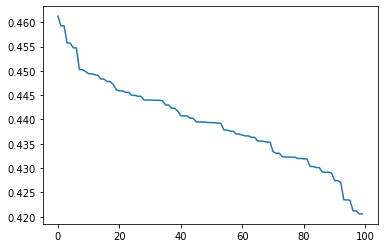

In [47]:
pd.Series(res["scores"]).plot()

In [50]:


for l in DF.loc[500,"le"]:
    print(res["labels"][l])

Secteur Agriculture & Zones rurales - Animation & développement économique et social
 Innovation produits & services - AIde aux investissements


In [49]:
idx = np.argmax(res["scores"])
print(idx)
res["labels"][idx]

0


"Evolution des procédés industriels - Réduction de la consommation d'énergie"